In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.shape

(100, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
df=df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
import matplotlib.pyplot as plt

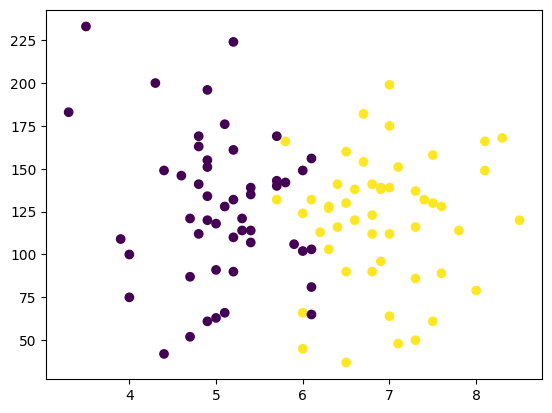

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [ ]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [ ]:
X.shape

(100, 2)

In [ ]:
y.shape

(100,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [ ]:
X_train

,cgpa,iq
7,5.0,63.0
86,5.1,128.0
9,5.1,66.0
90,7.3,86.0
66,6.9,96.0
...,...,...
1,5.9,106.0
23,4.7,87.0
58,8.0,79.0
95,4.3,200.0


In [ ]:
y_train

7     0
86    0
9     0
90    1
66    1
     ..
1     0
23    0
58    1
95    0
5     1
Name: placement, Length: 90, dtype: int64

In [ ]:
X_test

,cgpa,iq
13,6.4,116.0
32,7.0,139.0
89,4.9,151.0
56,6.1,65.0
35,6.8,90.0
97,6.7,182.0
82,6.5,37.0
81,5.4,107.0
49,5.4,135.0
33,6.0,149.0


In [ ]:
y_test

13    1
32    1
89    0
56    0
35    1
97    1
82    1
81    0
49    0
33    0
Name: placement, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)

In [ ]:
X_train

array([[-0.82885846, -1.55232772],
       [-0.74399241,  0.09369678],
       [-0.74399241, -1.47635735],
       [ 1.12306078, -0.96988828],
       [ 0.78359656, -0.71665374],
       [ 0.01980208, -0.00759704],
       [ 0.10466813, -0.53938957],
       [ 1.80198921,  0.62548931],
       [ 1.54739105, -0.26083157],
       [-0.65912635,  0.92937075],
       [ 0.10466813, -1.09650555],
       [-1.08345662, -0.0835674 ],
       [ 0.10466813,  0.19499059],
       [-0.48939424, -0.26083157],
       [ 0.44413235,  0.9040473 ],
       [ 1.80198921,  1.05598802],
       [-0.5742603 , -0.26083157],
       [-0.65912635, -0.86859446],
       [-0.74399241,  1.30922256],
       [ 1.12306078, -1.88153261],
       [ 2.14145343, -0.10889085],
       [-0.48939424,  0.37225477],
       [ 0.69873051, -0.31147848],
       [ 0.01980208, -1.47635735],
       [-0.99859057, -0.31147848],
       [ 0.78359656,  0.34693132],
       [-0.91372451,  1.81569163],
       [-0.99859057,  1.13195838],
       [ 0.18953419,

In [ ]:
X_test=sc.transform(X_test)

In [ ]:
X_test

array([[ 0.35926629, -0.21018467],
       [ 0.86846262,  0.37225477],
       [-0.91372451,  0.67613622],
       [ 0.10466813, -1.50168081],
       [ 0.69873051, -0.86859446],
       [ 0.61386446,  1.46116328],
       [ 0.44413235, -2.21073751],
       [-0.48939424, -0.43809575],
       [-0.48939424,  0.27096096],
       [ 0.01980208,  0.62548931]])

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
#model training
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
y_test

13    1
32    1
89    0
56    0
35    1
97    1
82    1
81    0
49    0
33    0
Name: placement, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

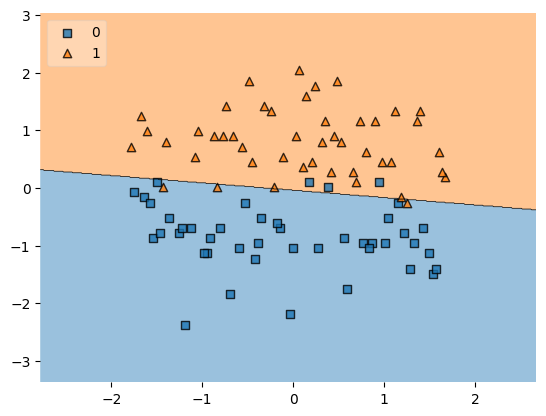

In [ ]:
plot_decision_regions(X_train,y_train.values,clf=lr,legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(lr,open('model.pkl','wb'))